<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
%matplotlib inline

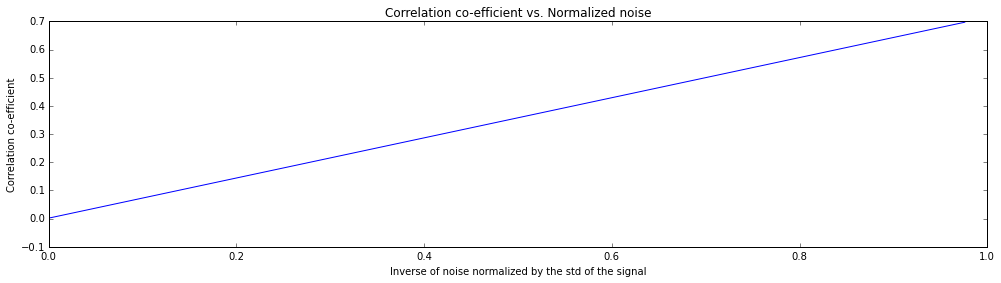

In [24]:
# constants
N = 200000
a = 1

def makePlot(a,N):
    # make 40 noise values spaced logarithmically between 0.01 and 100
    noisevalues = np.logspace(0.01,100.,40)

    r = np.zeros(40)
    for ind,n in enumerate(noisevalues):
        # make x, an N(0,1) random variable with 200,000 entries
        x = np.random.normal(0.,1.,N)
        x = x - np.mean(x)

        # capture noise for this noise level
        noise = np.random.normal(0.,n,N)

        # make y linearly dependent to x: y_i = a*x_i + n_i
        y = a*x + noise
        y = y - np.mean(y)

        # standard deviations of x and y 
        sx = np.std(x)
        sy = np.std(y)

        # correlation coefficient with one degree of freedom
        r[ind] = np.sum(x*y)/sx/sy/(N-1)

      
    
    return r,noisevalues,sx
    
r,noisevalues,sx = makePlot(a,N)

# Create the plot
plt.figure(figsize=(14,4))      # Make figure
gs=gridspec.GridSpec(1,1)       # Set up the layout
ax=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax.plot(a*sx/noisevalues,r)     # plot
#ax.loglog()
ax.set_xlabel('Inverse of noise normalized by the std of the signal')
ax.set_ylabel('Correlation co-efficient')
ax.set_title('Correlation co-efficient vs. Normalized noise')

# tighten the layout a bit
plt.tight_layout()

The above plot shows that the correlation co-efficient is linearly related to the inverse of the noise normalized by the standard deviation of the signal. From this, we can infer that the correlation co-efficient is thereby linearly related to the fraction of variance. 

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

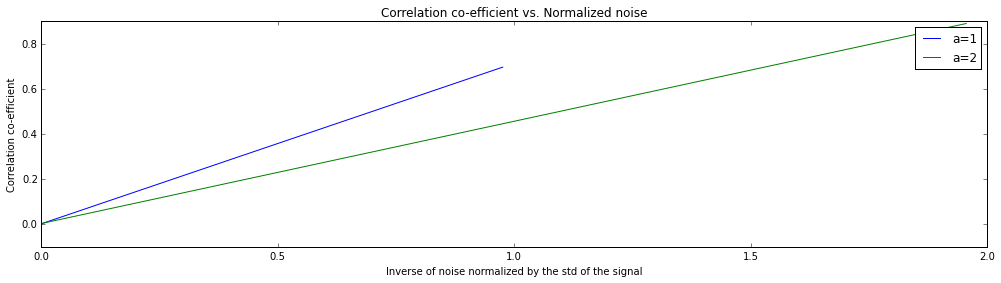

In [25]:
a2 = 2 # a new value

r2,noisevalues2,sx2 = makePlot(a2,N)

# Create the plot
plt.figure(figsize=(14,4))      # Make figure
gs=gridspec.GridSpec(1,1)       # Set up the layout
ax=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax.plot(a*sx/noisevalues,r,label='a=1')     # plot
ax.plot(a2*sx2/noisevalues2,r2,label='a=2')
#ax.loglog()
ax.set_xlabel('Inverse of noise normalized by the std of the signal')
ax.set_ylabel('Correlation co-efficient')
ax.set_title('Correlation co-efficient vs. Normalized noise')
ax.legend()

# tighten the layout a bit
plt.tight_layout()

From the equation y_i=ax_i+n_i we see that a is the slope of a y vs. x graph. The correlation co-efficient is proportional to the sum of the product of x_i and y_i (each subtracted by their means) divided by the product of their standard deviations. Thus, the correlation co-efficient is also proportional to some multiple of a, as seen by the changed graph above.

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

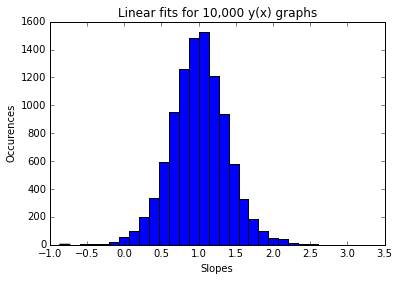

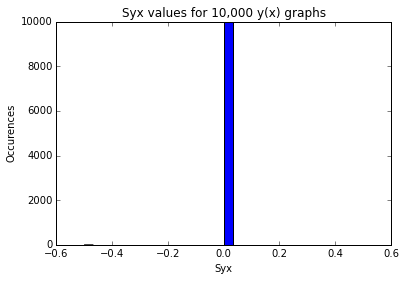

In [42]:
# Constants
N = 10
a = 1.0
n = 1.0
Nexps = 10000

# Collect 10000 slopes
b = np.zeros(Nexps)
syx = np.zeros(Nexps)
for i in range(Nexps):
    # make independent variable x, an N(0,1) random variable with 10 entries
    x = np.random.normal(0.,1.,N)

    # make noise values
    noise = np.random.normal(0.,n,N)

    # make dependent variable y
    y = a*x + noise

    # calculate the slope
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    b[i] = slope
    
# Make b histogram
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.hist(b,30)
ax.set_xlabel('Slopes')
ax.set_ylabel('Occurences')
ax.set_title('Linear fits for 10,000 y(x) graphs')

# Make syx histogram
fig=plt.figure();ax=fig.add_subplot(1,1,1); 
ax.hist(syx,30)
ax.set_xlabel('Syx')
ax.set_ylabel('Occurences')
ax.set_title('Syx values for 10,000 y(x) graphs')


YOUR ANSWER HERE

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [ ]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

**1** Make a scatterplot of James Bay versus Deep Cove.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**4** Add the confidence intervals to your fit, and comment.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  